***Nessa aula veremos: métricas de classificação, árvore de decisão.***

Classificação é um tema muito amplo em machine learning, a gente vai usar os próximos dois encontros para estudar classificação.

Hoje: Métricas de Classificação, Árvore de Decisão.
Próximo encontro: Ensemble learning e Random Forest.

Por hora, vimos regressão. Agora, vamos ver árvore de decisão (decision trees) para classificação.

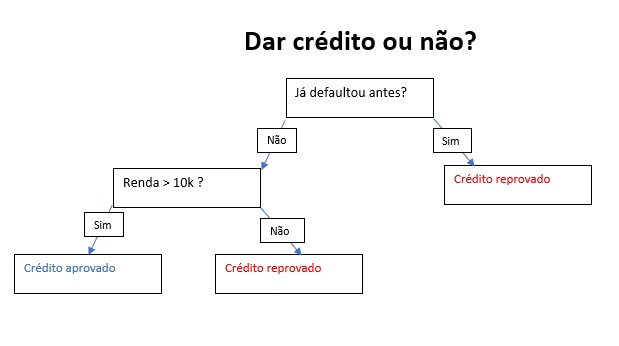

In [41]:
from IPython.display import Image
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\credito.jpg')

A parte de "machine learning" em árvores é que o modelo descobre quais variáveis usar e quais são os pontos de corte sozinho (sem ser programado para fazer exatamente isso).

Antes de entrar mais profundo em como o modelo seleciona os nós, vamos visualizar uma árvore:

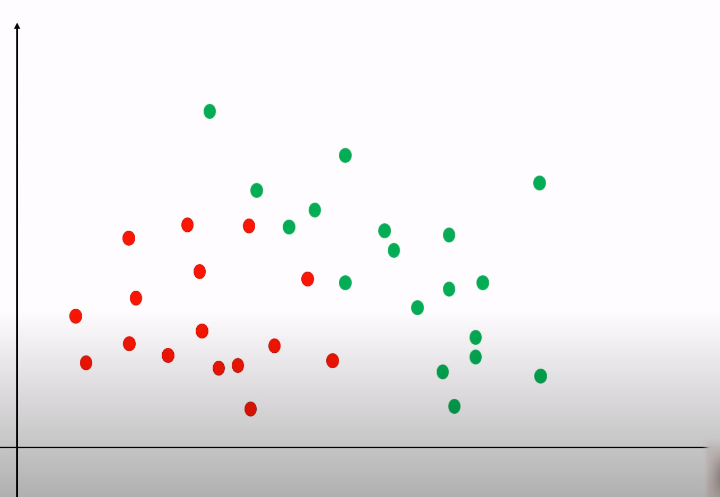

In [2]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\1.png')

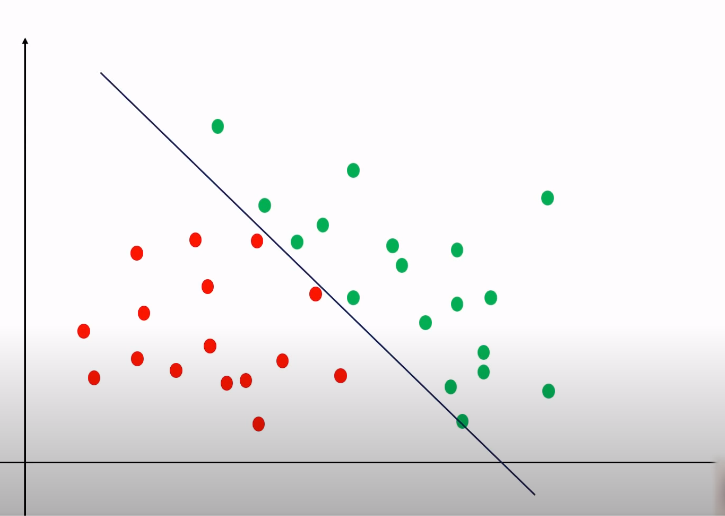

In [3]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\2.png')

E se os nossos dados fossem assim?


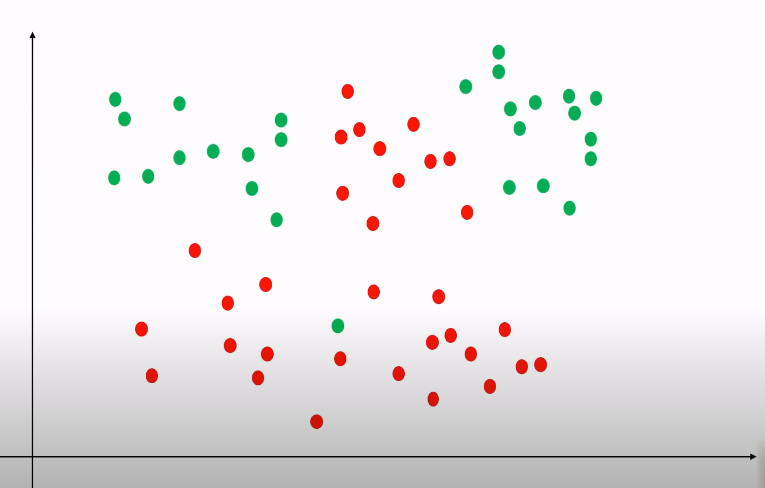

In [4]:
print("E se os nossos dados fossem assim?")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\3.png')

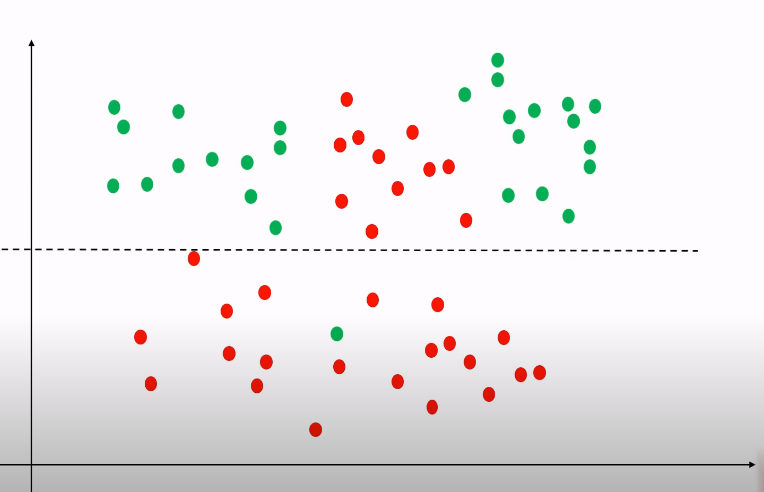

In [5]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\4.png')

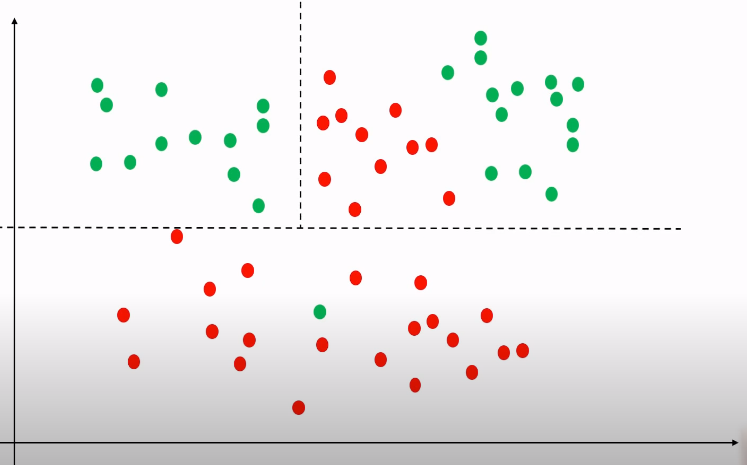

In [6]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\5.png')

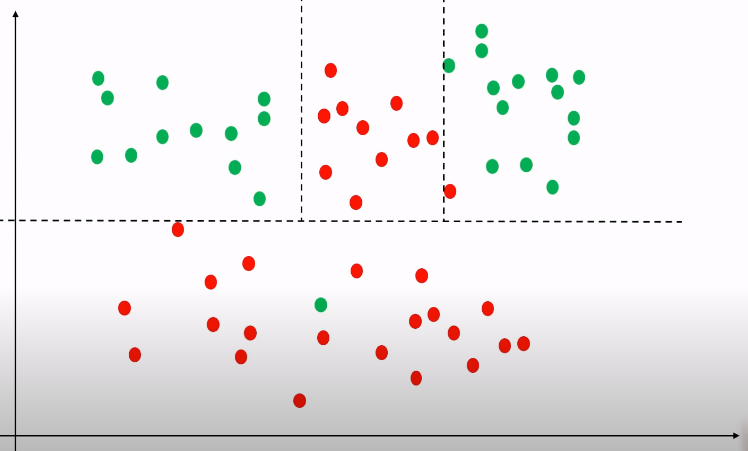

In [7]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\6.png')

Como a árvore descobre quais variáveis e quais pontos usar para cortar o nosso espaço em sub-espaços?

Resp: A gente tem vários algoritmos!

O algoritmo usado pelo Sklearn se chama CART, literalmente Classification And Regression Trees (que é o mesmo usado pelo rpart no R @igor).

A ideia por trás do CART é simples: dividir o dataset de forma a minimizar a impureza da soma dos dois datasets gerados.

Vamos supor que temos o seguinte dataset.
O objetivo é separar entre + e -


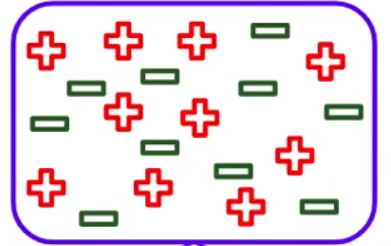

In [8]:
print("Vamos supor que temos o seguinte dataset.\nO objetivo é separar entre + e -")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\7.png')

			Cenário 1							Cenário2


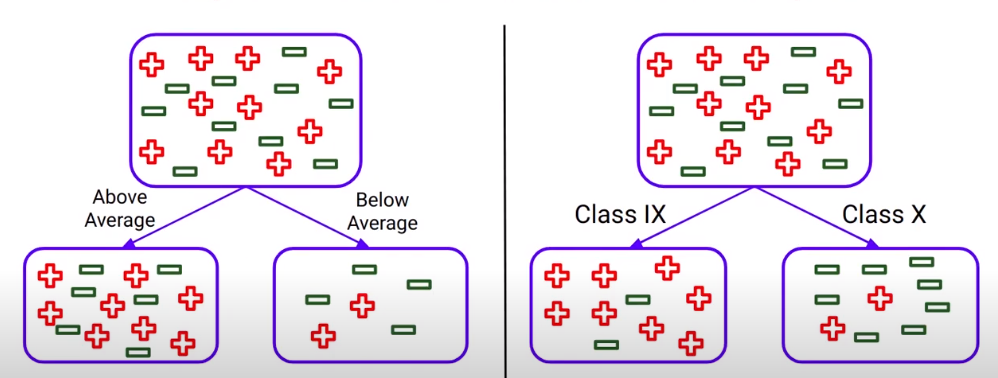

In [9]:
print("\t\t\tCenário 1\t\t\t\t\t\t\tCenário2")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\8.png')

Ou seja, o algoritmo testa com todas as variáveis e seleciona aquela que melhor divide o dataset de forma a minimizar a impureza **para o próximo passo**. Ele faz isso recursivamente até chegar em nós totalmente homogêneos.

O algoritmo não considera as futuras árvores e seleciona a que dá a melhor árvore no geral, ele só seleiona a variável que melhor divide o dataset naquele passo. A gente chama esses algoritmos de *algoritmo ganancioso* (greedy algorithm), eles só olham o passo atual, sem considerar as possibilidades futuras.

Algoritmos gananciosos costumam produzir um resultado bom gastando poucos recursos computacionais, ainda que não seja o ideal.

No caso da árvore seria impossível verificar todas as combinações de todas as variáveis com todos os pontos de cortes. É um problema NP-Completo.

Questão: Como medir impureza?

Resposta: O sklearn suporta 2 jeitos: coeficiente de gini e entropia.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Fórmula de gini


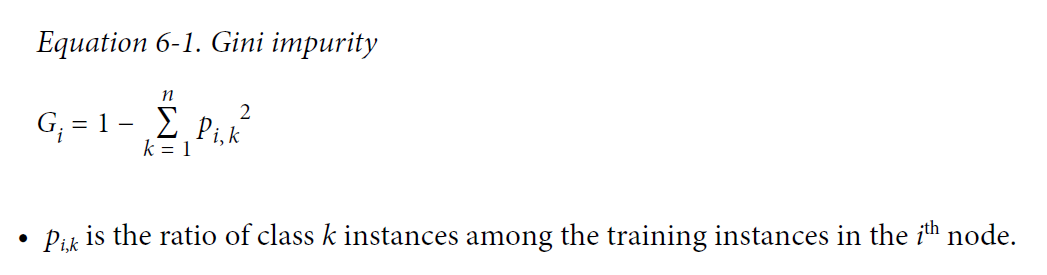

In [46]:
print("Fórmula de gini")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\11.png')

Aplicação da fórmula de Gini:
Nesse caso, o gini do nó verde em baixo seria igual a: G = 1 - [(0/54)^2 + (49/54)^2 + (5/54)^2] = 0.168


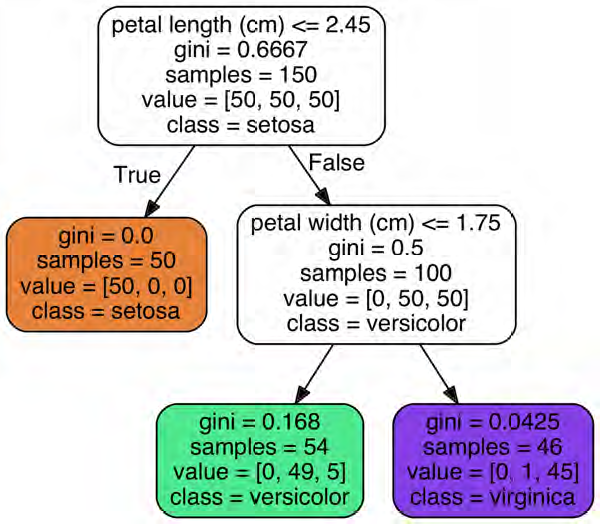

In [57]:
print("Aplicação da fórmula de Gini:")
print("Nesse caso, o gini do nó verde em baixo seria igual a: G = 1 - [(0/54)^2 + (49/54)^2 + (5/54)^2] = 0.168")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\10.png')

entropia  = - p1 log(p1) - p2 log(p2) - ...
Cada pi é a probabilidade (pocentagem relativa) da propriedade i dentro do conjunto


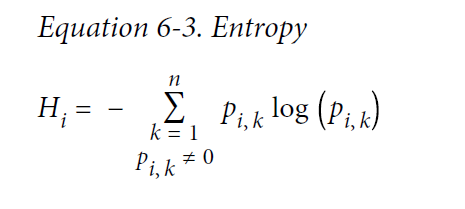

In [61]:
print("entropia  = - p1 log(p1) - p2 log(p2) - ...\nCada pi é a probabilidade (pocentagem relativa) da propriedade i dentro do conjunto")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\12.png')

 A entropia seria: − (49/54) log (49/54) − (5/54) log (5/54) = 0.31


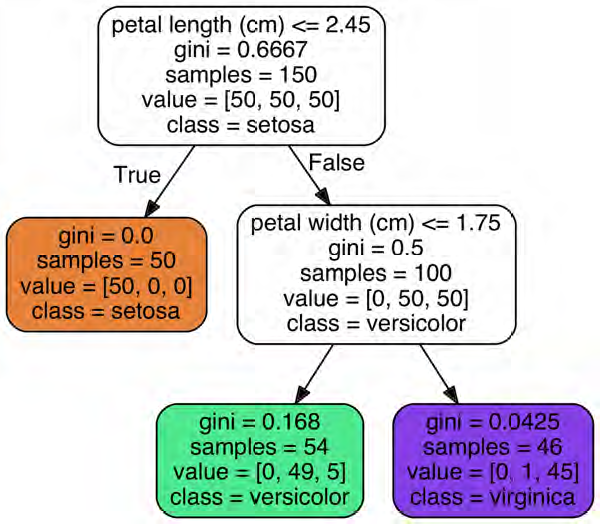

In [59]:
print(" A entropia seria: − (49/54) log (49/54) − (5/54) log (5/54) = 0.31")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\10.png')

Quem quiser saber mais sobre a diferença entre usar gini ou entropia: http://goo.gl/UndTrO

A função custo é a seguinte: 


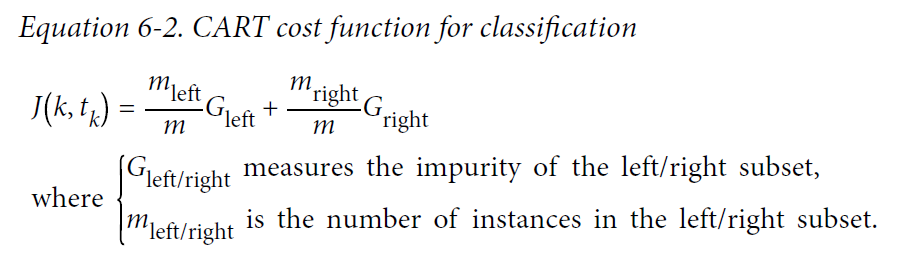

In [44]:
print("A função custo é a seguinte: ")
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\Imagens árvore\\9.png')

Então o algoritmo vai pegar uma variável de cada vez, testar todos os pontos de corte dessa variável que existem na base de dados (ainda que a variável seja contínua), calcular o ganho de informação para cada ponto de corte e ver qual ponto maximiza o ganho de informação. Aí, ele repete isso com todas as variáveis e todos os pontos de corte presentes na amostra e vê qual combinação de variável e ponto de corte melhor divide a amostra de tal forma que minimza a impureza geral. GENIAL!!!!!!

Uma coisa que fez a minha cabeça EXPLODIR foi como o algoritmo lida com variáveis contínuas. Não tem como medir todos os possíveis pontos de corte entre dois números. A reposta é que na verdade é possível porque o número de pontos de corte é limitado pelo tamanho da amostra. Ainda que a variável é contínua, nao tem como testar um ponto de corte que não exista na amostra.

Com tudo isso em mente, vamos rodar a árvore.

In [6]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("df_odauzaooo.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301,1
1,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.017780,0.1584,0.07065,...,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468,1
2,10.900,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,0.05743,...,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685,1
3,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.030270,0.1840,0.05680,...,32.29,107.40,826.4,0.1060,0.13760,0.16110,0.10950,0.2722,0.06956,1
4,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.077620,0.2116,0.06077,...,26.06,143.40,1426.0,0.1309,0.23270,0.25440,0.14890,0.3251,0.07625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.016150,0.1897,0.06329,...,35.19,77.98,455.7,0.1499,0.13980,0.11250,0.06136,0.3409,0.08147,1
386,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.020310,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,1
387,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.034850,0.1801,0.06520,...,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097,1
388,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.020680,0.1619,0.05584,...,34.23,91.29,632.9,0.1289,0.10630,0.13900,0.06005,0.2444,0.06788,1


In [13]:
#separando X e y
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

# dividindo entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
# importando o modelo
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
tree.score(X_test,y_test)

0.9591836734693877

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree,X,y,cv=5).mean()

0.9563710551052325

# Pergunta: esse modelo é bom?

Pra saber se o modelo é bom, a gente tem que primeiro saber como ele avalia, o que retorna quando a gente coloca .score()

# Accuracy = 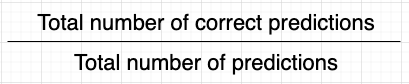
accuracy = total de acertos / total<br>
accuracy é equivalente à 1 - *taxa de erro*

In [17]:
y.value_counts()

1    357
0     33
Name: target, dtype: int64

In [18]:
357/(33+357)

0.9153846153846154

Chegamos 2a parte da aula! BAM!!!

Parte 2: Como avaliar um modelo de classificação?

from sklearn.metrics import precision_score, recall_score, confusion_matrix
print(f"Confusion Matrix =\n {confusion_matrix(y_test,tree.predict(X_test))}")
print(f"\nPrecision = {precision_score(y_test,tree.predict(X_test))}")
print(f"\nRecall = {recall_score(y_test,tree.predict(X_test))}")

print("Cross Validation:")
print(f"Average precision: {cross_val_score(tree,X,y,cv=5, scoring='precision').mean()}")
print(f"Average recall: {cross_val_score(tree,X,y,cv=5, scoring='recall').mean()}")

**Avaliar classificadores é mais complexo do que avaliar regressores.**

Análise de crédito, detecção de fraude, identificação de objetos (computer vision), identificação de digitos (MNIST), detecção de SPAM, exames médicos, etc.

Só um comentário, positivo e negativo...

positivo e negativo significa que o resultado do teste retornou positivo

OBS: Vamos usar os termos em inglês

# Accuracy = 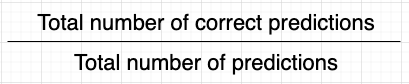
accuracy = total de acertos / total<br>
accuracy é equivalente à 1 - *taxa de erro*

2 problemas: não considera a proporção das classes, não diferencia entre erros (tipo 1 e tipo 2)

Considere um problema de classificação no qual uma classe é rara: detecção de fraude em cartão de crédito.<br>
"The average clickthrough rate for Google Adwords is approximately 3%" - WordStream. Se a gente tivesse um modelo que prevê se uma pessoa vai clicar na propaganda, classificando todo mundo como falso daria precisão de 97%.

O problema 2 é que a accuracy não diferencia falsos positivos de falsos negativos. Essa distinção é CRUCIAL na vida real. Não tem regra, cada caso é um caso. Por exemplo, em um modelo de fraude, falso negativo é mais grave que falso positivo, enquanto que em um modelo de crédito, falso positivo é mais grave que falso negativo.

Pra resolver esse problemas, os estatísticos criaram outras métricas: Recall/Sensitividade, Especificidade, Curva ROC, etc.

# Matriz de confusão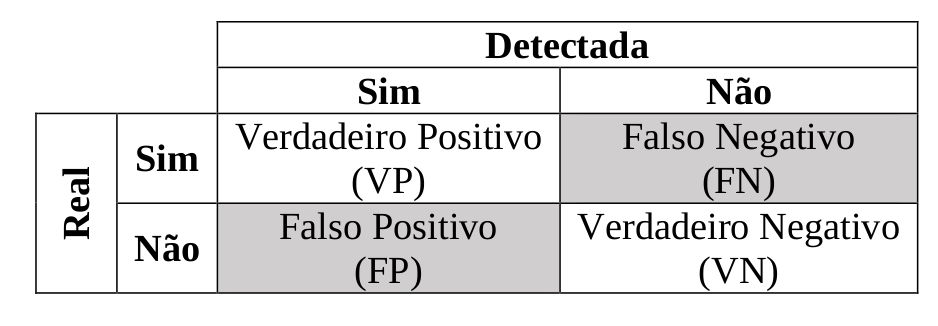

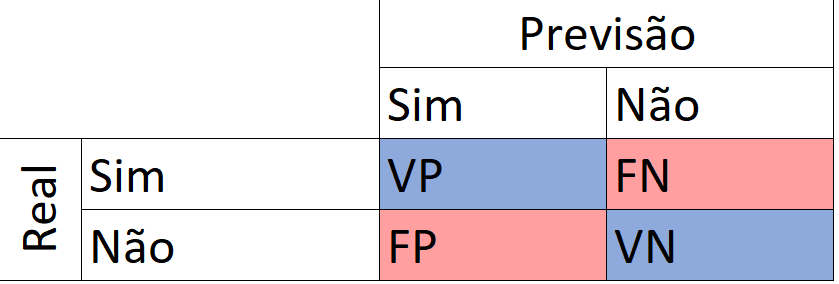

In [19]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\matriz de confusão.png')

# Recall = VP/(VP + FN)

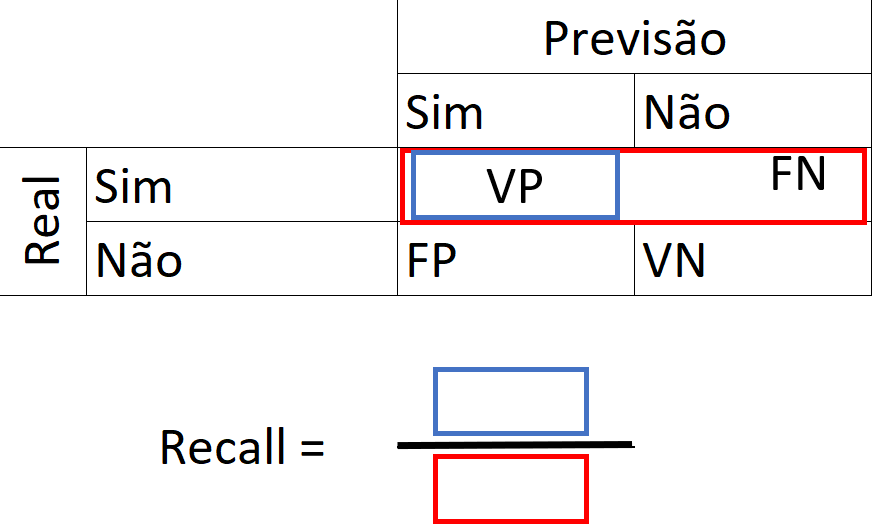

In [20]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\recall.png')

Recall: dos que são positivos na realidade, quanto porcento foi classificado corretamente como positivo?<br>
Quanto, entre os positivos, eu classifiquei corretamente?

Recall = VP/(total classificado como positivo)

Recall de 100% significa que todo mundo que de fato era positivo, eu classifiquei como positivo.

Veja como que o recall não diz respeito aos casos negativos, ele só avalia positivos. Dá pra ter recall de 100% se a gente classificar todo mundo como positivo.

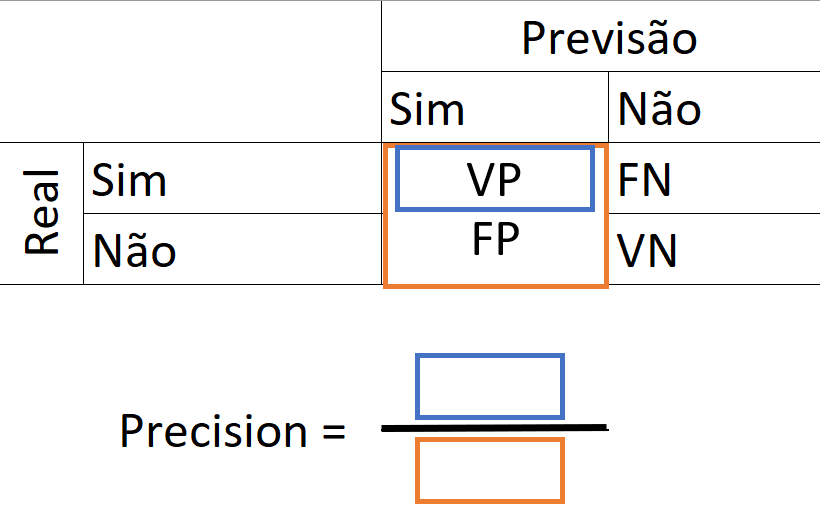

In [21]:
Image('H:\\Onedrive\\FGV\\6 semestre\\GVCODE Projetos\\Grupo de Estudos\\Aula de classificacao\\precision.png')

Precision = (VP)/(VP+FP)

Precision mede do total classificado como positivo, quanto era de fato positivo. Ou seja, mede a porcentagem de verdadeiros positivos entre todos os classificados como positivos.

A precisão mede quão boa está a nossa previsão em relação aos positivos. Precisão de 100% significa que a nossa previsão dos positivos é perfeita: todo mundo classificado como positivo era verdadeiro positivo.

"Precision answers the following question: what proportion of predicted Positives is truly Positive?".

"Recall answers a different question: what proportion of actual Positives is correctly classified?".

Naturalmente, há um tradeoff entre precision e recall
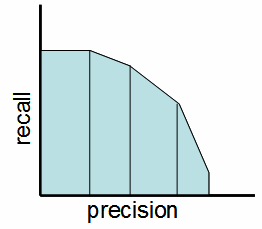

And thus comes the idea of utilizing tradeoff of precision vs. recall — F1 Score.
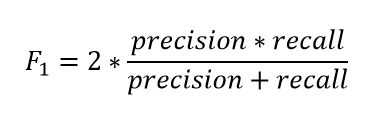

Para ir além:<br>
https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226<br>
https://towardsdatascience.com/are-you-evaluating-your-model-performance-correctly-dcbb378ab489<br>
https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

Mas dá pra ver como é fácil se confundir... Pra isso existe ROC.

ROC (Receiver operating characteristic) -> vem da engenharia elétrica, eu não sei o motivo por trás do nome.

ROC é uma curva que mede a capacidade de modelos em distinguir entre duas classes. Por exemplo, se a gente estiver avaliando um modelo de crédito, a ROC mede a capacidade do modelo de diferenciar bom pagador de mau pagador.

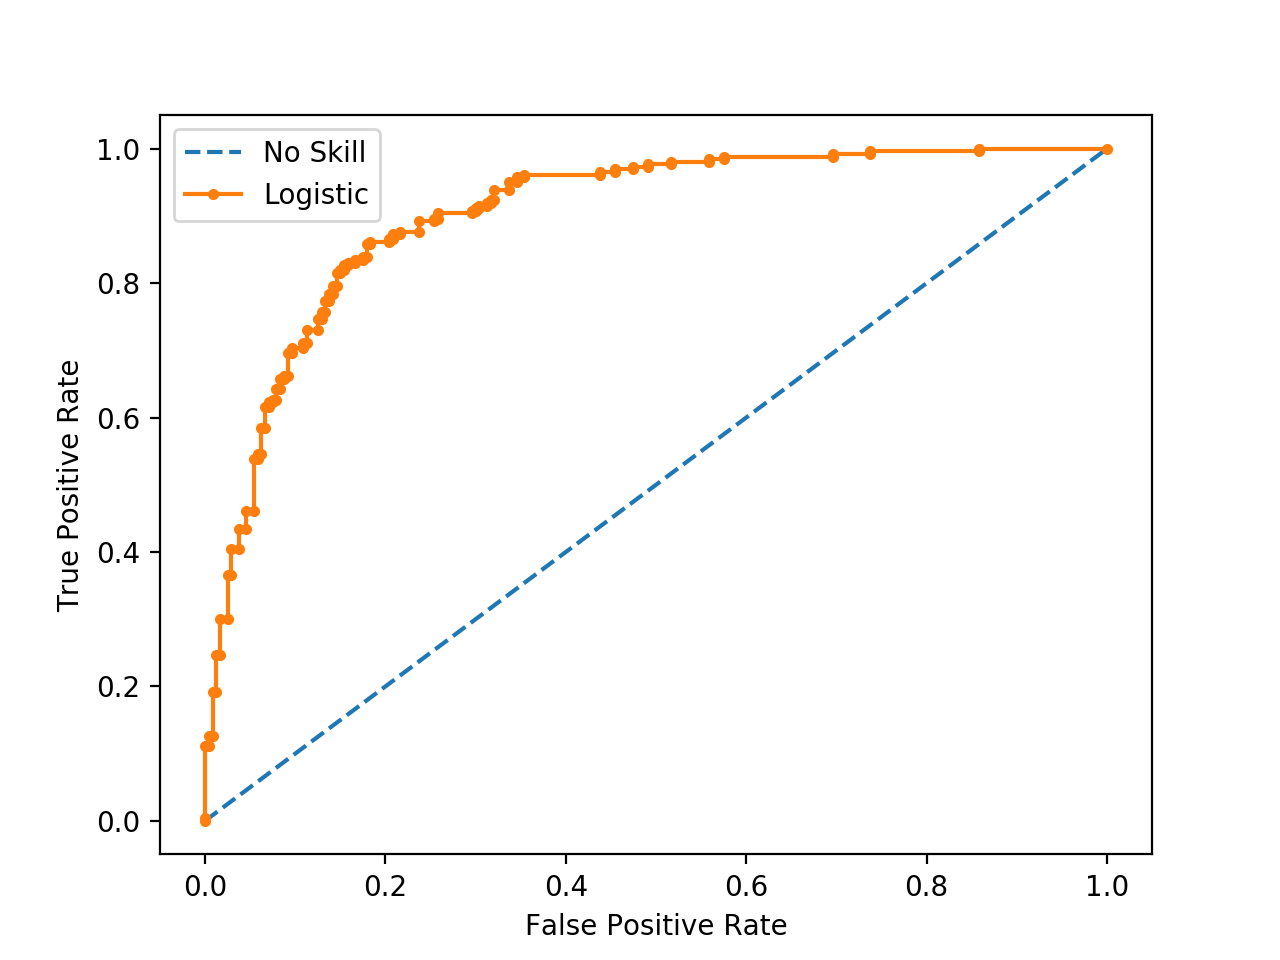

Curva ROC perfeita: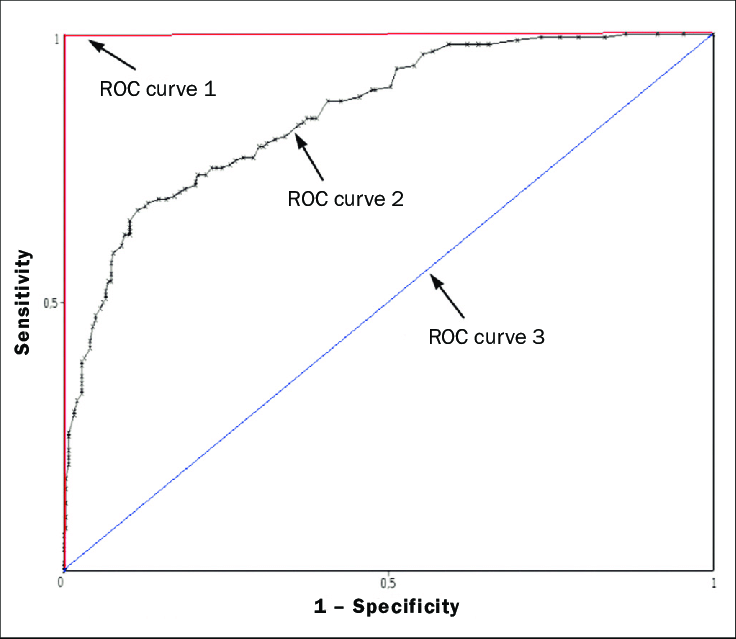

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

True Positive Rate = Recall = Sensitivity<br>
False Positive Rate = 1- Specificity = taxa de alarme falso

# Exemplo usando árvore (agora de verdade rss)

In [4]:
# carregando os dados
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [7]:
# transformando em dataframe
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

In [8]:
# visualizando
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0.0


In [9]:
# separando X e y
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

In [10]:
y.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [11]:
357/(357+212)

0.6274165202108963

In [12]:
# dividindo entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [17]:
# importando o modelo
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
arvore.score(X_test,y_test)

0.9370629370629371

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(arvore,X,y,cv=5).mean()

0.9138899576760291

In [20]:
y_test.value_counts()

1.0    95
0.0    48
Name: target, dtype: int64

In [17]:
(95)/(95+48)

0.6643356643356644

In [21]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
print(f"Confusion Matrix =\n {confusion_matrix(y_test,arvore.predict(X_test))}")
print(f"\nPrecision = {precision_score(y_test,arvore.predict(X_test))}")
print(f"\nRecall = {recall_score(y_test,arvore.predict(X_test))}")

Confusion Matrix =
 [[47  1]
 [ 8 87]]

Precision = 0.9886363636363636

Recall = 0.9157894736842105


In [22]:
print("Cross Validation:")
print(f"Average precision: {cross_val_score(arvore,X,y,cv=5, scoring='precision').mean()}")
print(f"Average recall: {cross_val_score(arvore,X,y,cv=5, scoring='recall').mean()}")

Cross Validation:
Average precision: 0.946706045741319
Average recall: 0.9299687010954617


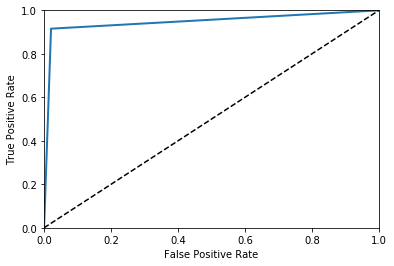

0.9474780701754385

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred = arvore.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

# auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

# comparando com outro método
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# pred
y_pred = log_reg.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# AUC
plot_roc_curve(fpr,tpr)
plt.show()

print(f"AUC = {roc_auc_score(y_test,y_pred)}")

# comparando com rede neural
from sklearn.neural_network import MLPClassifier
rede = MLPClassifier()
rede.fit(X_train,y_train)

# pred
y_pred = rede.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# AUC
plot_roc_curve(fpr,tpr)
plt.show()

print(f"AUC = {roc_auc_score(y_test,y_pred)}")

# Plotando uma árvore

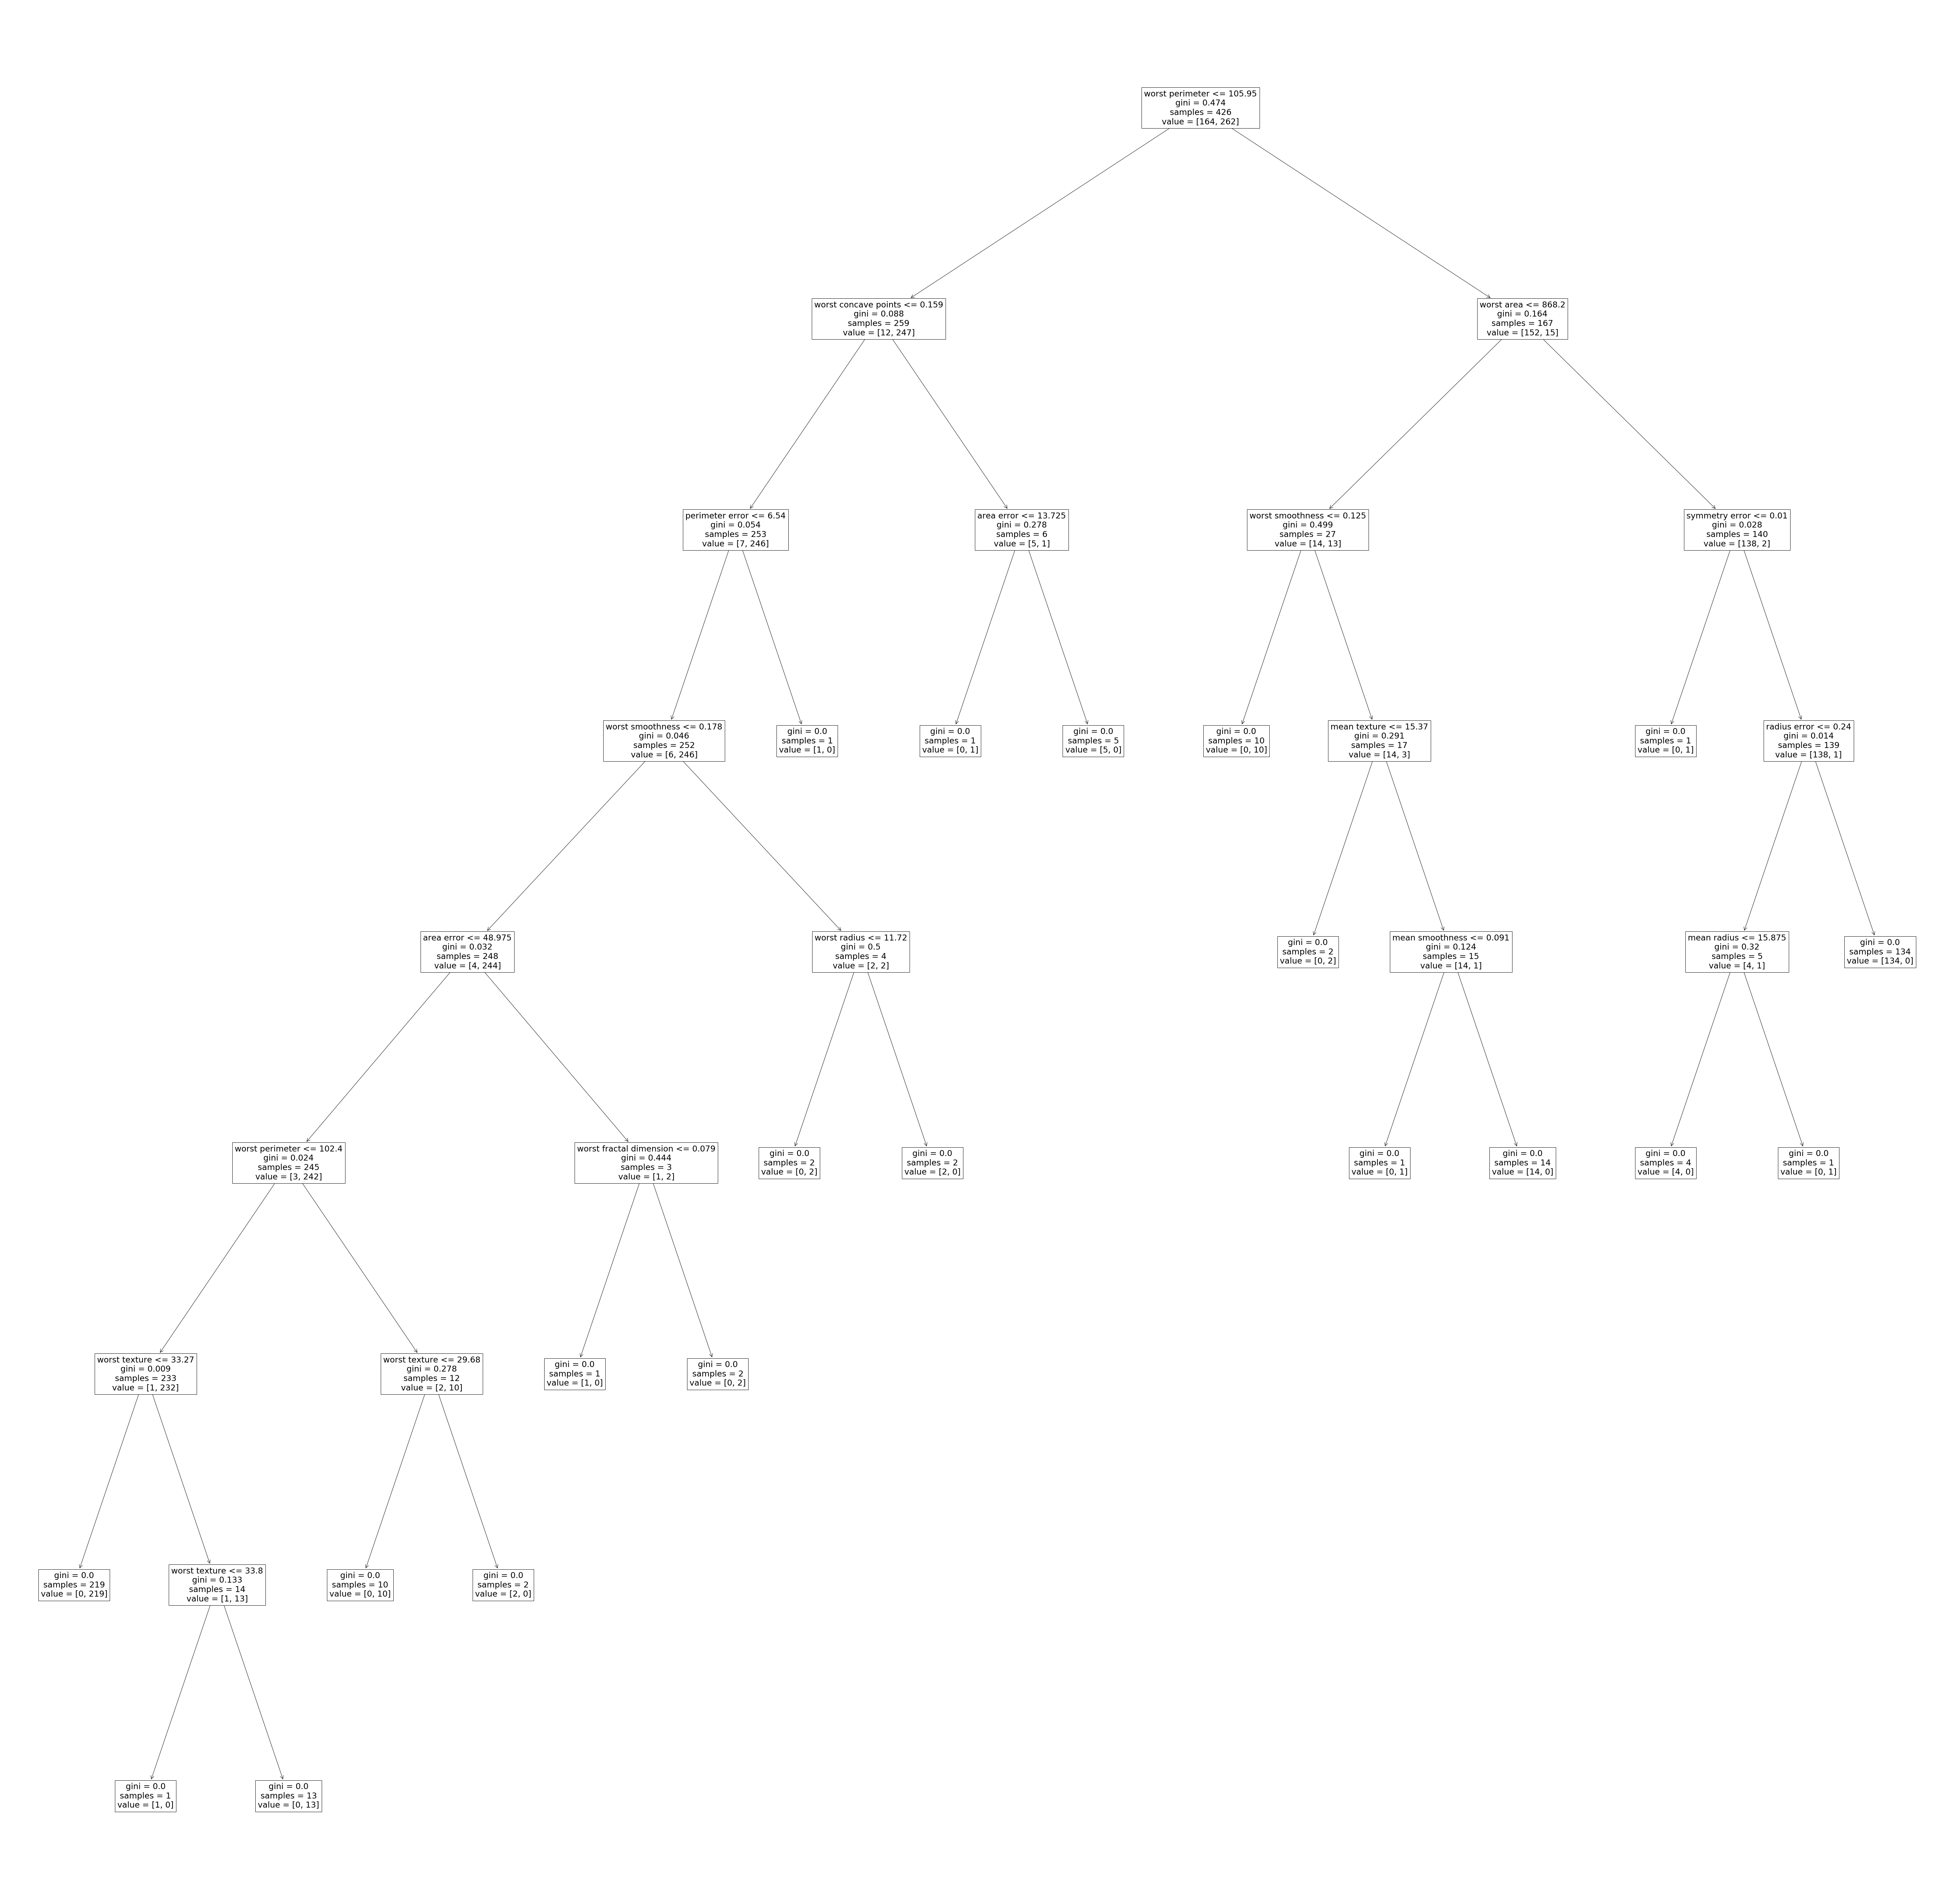

In [155]:
from sklearn.tree import *
plt.figure(figsize=(100,100))
plot_tree(arvore,feature_names=list(X.columns))
plt.show()

In [156]:
print(export_text(arvore,feature_names=list(X.columns)))

|--- worst perimeter <= 105.95
|   |--- worst concave points <= 0.16
|   |   |--- perimeter error <= 6.54
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |--- worst perimeter <= 102.40
|   |   |   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |   |   |--- worst texture <= 33.80
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- worst texture >  33.80
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- worst perimeter >  102.40
|   |   |   |   |   |   |--- worst texture <= 29.68
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- worst texture >  29.68
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- area error >  48.98
|   |   |   |   |   |--- worst fractal dimension <= 0.08
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--

# Overfit?

Se por um lado, árvores de decisão:<br>
1) São fáceis de interpretar<br>
2) São rápidas de treinar e rodar ("The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree." - Sklearn)<br>
3) Requer pouca preparação dos dados (normalizar, produzir dumy variable, etc)<br>
4) Consegue lidar tanto com dados numéricos quanto com categóricos<br>
5) Assume pouco sobre a natureza dos dados (diferente de uma regressão linear,que assume linearidade)<br> Isso acontece porque é um *modelo não paramétrico*, ou seja, o número de parâmetros não é determinado antes do treino.<br>


Por outro lado, ela apresenta muita varância, i.e. é muito dependente dos dados de treino, i.e. dá muito overfit.

Para evitar o overfit, nós podemos limitar o tamanho da arvore:

max_depth => máxima profundidade da árvore (default = None) <br>
min_samples_split => quantidade mínima de amostras que um nó precisa ter para ser dividido novamente (default = 2)<br>
min_samples_leaf => quantidade mínima por nó folha. (default = 1)<br> 

Por default, o sklearn não limita o tamanho da árvore.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

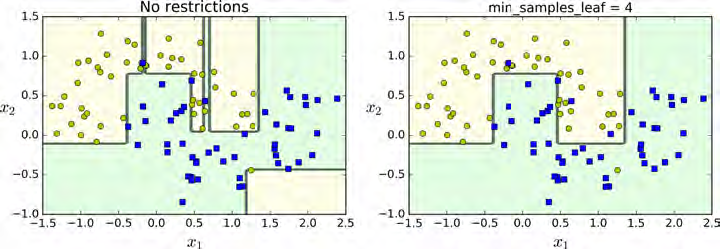

# Quais são os limites da árvore de decisão???

### Testando árvore no MNIST

In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [21]:
mnist["data"].shape

(70000, 784)

In [22]:
X, y = mnist["data"],mnist["target"]

In [23]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [24]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [25]:
from sklearn.tree import *
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
model.score(X_test,y_test)

0.8781

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5).mean()

0.8708293940699982

In [32]:
print(f"Confusion Matrix =\n {confusion_matrix(y_test,model.predict(X_test))}")

Confusion Matrix =
 [[ 915    1    8    5    4   14   12    3    9    9]
 [   2 1091    9    6    1    3    8    3   10    2]
 [  12    9  889   31   13    9   12   26   21   10]
 [   5    2   31  867    7   42    5    7   23   21]
 [   7    5    8    7  853   14   15   14   22   37]
 [  14    6    3   44   12  747   22    6   20   18]
 [  17    4   14   10   15   22  847    2   20    7]
 [   2   14   21   21   10    3    5  924    9   19]
 [  14    8   28   38   22   31   19    9  782   23]
 [  11    2    7   19   42   13    4   22   23  866]]
